In [1]:
import xarray as xr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = '/ocean/rbeutel/data/201609/U_new_20160901.nc'
mydata = xr.open_dataset(file)
u = mydata.vozocrtx

In [3]:
file = '/ocean/rbeutel/data/201609/V_new_20160901.nc'
mydata = xr.open_dataset(file)
v = mydata.vomecrty

In [4]:
# one example of bad stuff happenning
ii = 646-1
jj = 329 -1
kk = 38 -1
# then error is ww(ii,jj+1,kk,1) related

(620.0, 700.0)

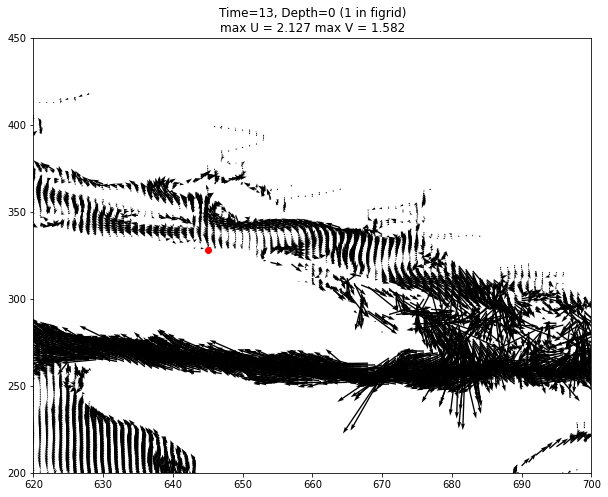

In [5]:
kk=0
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.quiver(u.x, u.y, u[13,kk,:,:], v[13,kk,:,:],scale=12)
ax.set_title('Time=13, Depth=0 (1 in figrid)\nmax U = '+str(np.round(u[13,kk,:,:].max().values,3))+' max V = '+str(np.round(v[13,kk,:,:].max().values,3)))
ax.scatter(ii,jj,c='r')
ax.set_ylim([200,450])
ax.set_xlim([620,700])

(630.0, 650.0)

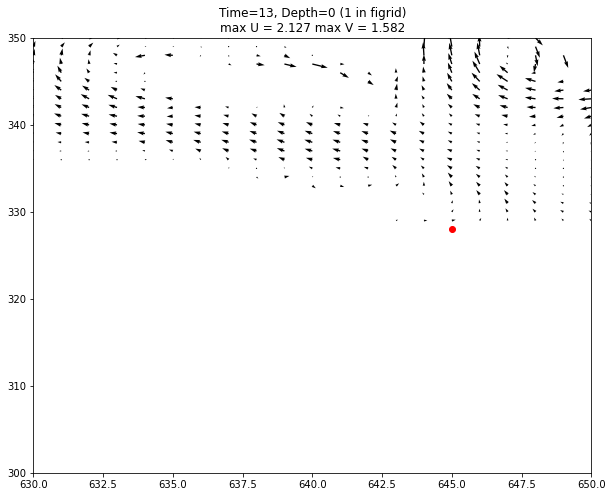

In [6]:
# ZOOM
kk=0
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.quiver(u.x, u.y, u[13,kk,:,:], v[13,kk,:,:],scale=12)
ax.set_title('Time=13, Depth=0 (1 in figrid)\nmax U = '+str(np.round(u[13,kk,:,:].max().values,3))+' max V = '+str(np.round(v[13,kk,:,:].max().values,3)))
ax.scatter(ii,jj,c='r')
ax.set_ylim([300,350])
ax.set_xlim([630,650])

(620.0, 700.0)

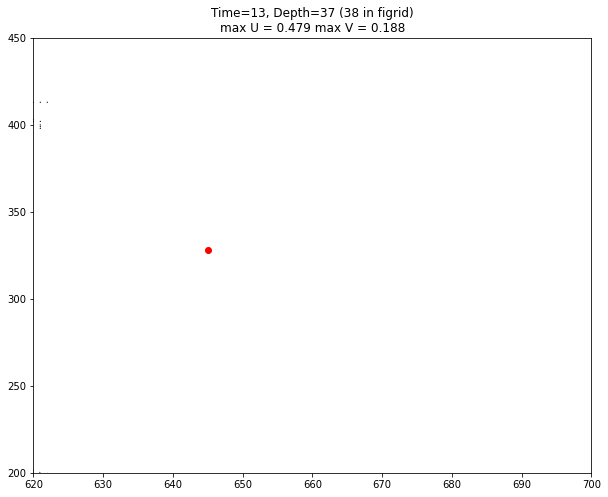

In [7]:
kk=38-1
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.quiver(u.x, u.y, u[13,kk,:,:], v[13,kk,:,:],scale=12)
ax.set_title('Time=13, Depth=37 (38 in figrid)\nmax U = '+str(np.round(u[13,kk,:,:].max().values,3))+' max V = '+str(np.round(v[13,kk,:,:].max().values,3)))
ax.scatter(ii,jj,c='r')
ax.set_ylim([200,450])
ax.set_xlim([620,700])

## OK so where i'm getting an eddy error is not only NOT within the area that i'm looking but ALSO just straightup land at that depth.... 

In [28]:
# check salinity at that locaiton to make sure also land
file = '/ocean/rbeutel/data/201706/S_new_20170609.nc'
mydata = xr.open_dataset(file)
s = mydata.vosaline

In [32]:
s[13,:,jj,ii]

<xarray.DataArray 'vosaline' (deptht: 75)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan], dtype=float32)
Coordinates:
  * deptht        (deptht) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03
    nav_lat       float32 ...
    nav_lon       float32 ...
    time_counter  datetime64[ns] 2017-06-09T14:00:00
Attributes:
    standard_name:       sea_water_salinity
    long_name:           Sea Water Salinity
    units:               0.001
    online_operation:    instant
    interval_operation:  1 d
    interval_write:      1 d
    cell_methods:        time: point

In [33]:
s[13,:,jj+1,ii]

<xarray.DataArray 'vosaline' (deptht: 75)>
array([24.996279, 25.611929, 25.892117, 26.576416, 27.045385, 27.442102,
       27.794334, 28.08241 , 28.337559, 28.442526,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan], dtype=float32)
Coordinates:
  * deptht        (deptht) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03
    nav_lat       float32 ...
    nav_lon       float32 ...
    time_counter  datetime64[ns] 2017-06-09T14:00:00
Attributes:
    standard_name:       sea_water_salinity
    long_name:           Sea Water Salinity
    units:               0.001
    online_operation:    instant
    interval_operation:  1 d
    interval_write:      1 d
    cell_methods:        time: point

In [34]:
# ok so can confirm that that locaiton is land all the time, and if you move to jj+1 its still land at kk=38

# FIXED!
the problem was that you had a new segrid file and a new sections.txt file for the different CIOPS boundaries you wanted to run but not new region_limits files and more - would have had to rerun mkseg whenever you swtiched between the files - remedied by jsut puting these in three seperate subfolders like they should have been in in the first place